In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import scipy.stats
from sklearn.model_selection import train_test_split

In [2]:
# φόρτωση δεδομένων
ded=pd.read_excel('CogTEL_new.xlsx')

In [3]:
# απαιτούμε την εμφάνιση ολόκληρου του συνόλου δεδομένων 
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)


In [4]:
# μετατροπή αλφαριθμητικών σε float και παράλληλα μετατροπή "-" σε NaN
ded['education']=pd.to_numeric(ded['education'],errors='coerce')
ded['GDS_6']=pd.to_numeric(ded['GDS_6'],errors='coerce')
ded['GDS_8']=pd.to_numeric(ded['GDS_8'],errors='coerce')
ded['GDS_9']=pd.to_numeric(ded['GDS_9'],errors='coerce')
ded['NPIJ32F']=pd.to_numeric(ded['NPIJ32F'],errors='coerce')

In [5]:
# για να μπορώ να εξάγω τις συγκεκριμένες στήλες (αχρείαστο βήμα...)
ded = ded.rename(columns={'Antidepressants ': 'Antidepressants' })
ded = ded.rename(columns={'Concentration/attention' : 'Concentration_attention'})

# Missing values

In [6]:
rows_with_nan = [index for index, row in ded.iterrows() if row.isnull().any()]

print(rows_with_nan)

[27, 28, 42, 44, 63, 67, 68, 69, 86, 133, 135, 139, 156, 159, 175, 200, 203, 213, 227, 241, 244, 245, 259, 260, 265, 271, 272, 281, 311, 319, 330, 337, 348, 360, 381, 450, 455, 486]


In [7]:
# εμφάνιση missing values ανά μεταβλητή
ded.isna().sum()

Age                         0
Sex                         0
education                   1
diagnosis                   0
GDS_1                       7
GDS_2                       7
GDS_3                       7
GDS_4                       7
GDS_5                       7
GDS_6                       8
GDS_7                       7
GDS_8                       9
GDS_9                       8
GDS_10                      7
GDS_11                      7
GDS_12                      8
GDS_13                      8
GDS_14                      8
GDS_15                      8
Antidepressants            27
MOCA-1                      2
MOCA-2                      2
MOCA-4                      2
MOCA-5                      2
MOCA-6                      2
MOCA-7                      2
MOCA-8                      2
MOCA-9                      2
MOCA-10                     2
MOCA-11                     2
NPIJ32S                     0
NPIJ32F                     1
NPIJ33S                     0
NPIJ33F   

In [8]:
# αφαίρεση στιγμιοτύπων με missing values
ded=ded.dropna()

# Boxplots

<AxesSubplot:ylabel='education'>

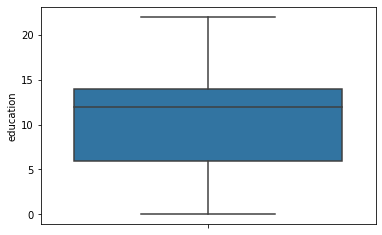

In [9]:
sns.boxplot(y=ded['education'])

<AxesSubplot:xlabel='Sex', ylabel='Age'>

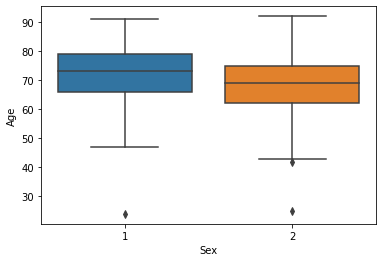

In [10]:
sns.boxplot(x=ded['Sex'],y=ded['Age'])

<AxesSubplot:ylabel='Age'>

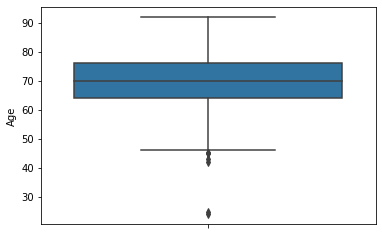

In [11]:
sns.boxplot(y=ded['Age'])

In [12]:
ded['Age'].mean()

69.75581395348837

In [13]:
# αφαίρεση των παραδειγμάτων ηλικίας 50 και κάτω
dedomena=ded[ded['Age']>49]

<AxesSubplot:ylabel='Age'>

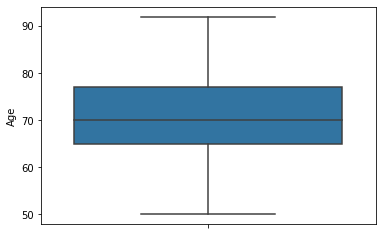

In [14]:
sns.boxplot(y=dedomena['Age'])

In [15]:
dedomena['Age'].mean()

70.41071428571429

In [16]:
ded.shape

(516, 61)

In [17]:
# το πλήθος παρατηρήσεων των δεδομένων με την αφαίρεση των outliers
dedomena.shape

(504, 61)

# Περιγραφικά στατιστικά 

In [18]:
# To έγκυρο σύνολο δεδομένων με την αφαίρεση των outliers και missing values ονομάζεται dedomena
dedomena.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 552
Data columns (total 61 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      504 non-null    int64  
 1   Sex                      504 non-null    int64  
 2   education                504 non-null    float64
 3   diagnosis                504 non-null    int64  
 4   GDS_1                    504 non-null    float64
 5   GDS_2                    504 non-null    float64
 6   GDS_3                    504 non-null    float64
 7   GDS_4                    504 non-null    float64
 8   GDS_5                    504 non-null    float64
 9   GDS_6                    504 non-null    float64
 10  GDS_7                    504 non-null    float64
 11  GDS_8                    504 non-null    float64
 12  GDS_9                    504 non-null    float64
 13  GDS_10                   504 non-null    float64
 14  GDS_11                   5

In [19]:
dedomena.describe()

Age         Sex   education   diagnosis       GDS_1       GDS_2  \
count  504.000000  504.000000  504.000000  504.000000  504.000000  504.000000   
mean    70.410714    1.660714   10.392857    0.918651    0.301587    0.496032   
std      8.826355    0.473937    4.412663    0.955953    0.459403    0.500481   
min     50.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%     65.000000    1.000000    6.000000    0.000000    0.000000    0.000000   
50%     70.000000    2.000000   12.000000    1.000000    0.000000    0.000000   
75%     77.000000    2.000000   14.000000    1.000000    1.000000    1.000000   
max     92.000000    2.000000   22.000000    3.000000    1.000000    1.000000   

            GDS_3       GDS_4       GDS_5       GDS_6       GDS_7       GDS_8  \
count  504.000000  504.000000  504.000000  504.000000  504.000000  504.000000   
mean     0.355159    0.309524    0.394841    0.376984    0.375000    0.230159   
std      0.479037    0.462757    0.489302    0.485112    0.484604    0.421353   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            GDS_9      GDS_10      GDS_11      GDS_12      GDS_13      GDS_14  \
count  504.000000  504.000000  504.000000  504.000000  504.000000  504.000000   
mean     0.367063    0.480159    0.095238    0.109127    0.279762    0.244048   
std      0.482483    0.500103    0.293835    0.312108    0.449328    0.429948   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    1.000000    0.000000    0.000000    1.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           GDS_15  Antidepressants      MOCA-1      MOCA-2      MOCA-4  \
count  504.000000       504.000000  504.000000  504.000000  504.000000   
mean     0.111111         0.295635    3.335317    2.662698    1.716270   
std      0.314582         0.456781    1.508314    0.728105    0.550486   
min      0.000000         0.000000    0.000000    0.000000    0.000000   
25%      0.000000         0.000000    2.000000    3.000000    2.000000   
50%      0.000000         0.000000    4.000000    3.000000    2.000000   
75%      0.000000         1.000000    5.000000    3.000000    2.000000   
max      1.000000         1.000000    5.000000    3.000000    2.000000   

           MOCA-5      MOCA-6      MOCA-7      MOCA-8      MOCA-9     MOCA-10  \
count  504.000000  504.000000  504.000000  504.000000  504.000000  504.000000   
mean     0.922619    2.204365    1.551587    0.305556    1.517857    2.944444   
std      0.274793    1.148904    0.694567    0.461100    0.715963    1.878223   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    1.000000    1.000000    0.000000    1.000000    1.000000   
50%      1.000000    3.000000    2.000000    0.000000    2.000000    3.000000   
75%      1.000000    3.000000    2.000000    1.000000    2.000000    5.000000   
max      2.000000    5.000000    2.000000    1.000000    2.000000    6.000000   

          MOCA-11     NPIJ32S     NPIJ32F     NPIJ33S     NPIJ33F     NPIJ34S  \
count  504.000000  504.000000  504.000000  504.000000  504.000000  504.000000   
mean     5.503968    0.093254    0.148810    0.077381    0.148810    0.267857   
std      1.112009    0.464692    0.724245    0.408610    0.710388    0.694825   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      6.000000    0

In [20]:
dedomena.isna().sum()

Age                        0
Sex                        0
education                  0
diagnosis                  0
GDS_1                      0
GDS_2                      0
GDS_3                      0
GDS_4                      0
GDS_5                      0
GDS_6                      0
GDS_7                      0
GDS_8                      0
GDS_9                      0
GDS_10                     0
GDS_11                     0
GDS_12                     0
GDS_13                     0
GDS_14                     0
GDS_15                     0
Antidepressants            0
MOCA-1                     0
MOCA-2                     0
MOCA-4                     0
MOCA-5                     0
MOCA-6                     0
MOCA-7                     0
MOCA-8                     0
MOCA-9                     0
MOCA-10                    0
MOCA-11                    0
NPIJ32S                    0
NPIJ32F                    0
NPIJ33S                    0
NPIJ33F                    0
NPIJ34S       

In [21]:
a=dedomena[["Sex", "Age"]].groupby("Sex").mean()
b=dedomena[["Sex", "Age"]].groupby("Sex").std()
a,b

(           Age
 Sex           
 1    71.918129
 2    69.636637,
           Age
 Sex          
 1    8.533275
 2    8.886675)

In [22]:
c=dedomena[["Sex", "education"]].groupby("Sex").mean()
d=dedomena[["Sex", "education"]].groupby("Sex").std()
c,d

(     education
 Sex           
 1    10.672515
 2    10.249249,
      education
 Sex           
 1     4.186576
 2     4.523803)

In [23]:
dedomena.groupby("Sex")["Sex"].count()

Sex
1    171
2    333
Name: Sex, dtype: int64

In [24]:
dedomena.groupby("Age")["Age"].count()

Age
50     3
51     5
52     3
53     5
54     3
55     7
56    10
57    10
58     6
59    10
60    16
61    13
62     9
63    12
64    13
65    20
66    15
67    24
68    18
69    28
70    23
71    17
72    18
73    28
74    26
75    17
76    18
77     8
78    12
79    20
80    16
81    12
82    16
83    10
84    12
85     6
86     2
87     3
88     4
89     3
90     1
91     1
92     1
Name: Age, dtype: int64

In [25]:
# μέση ηλικία ανα διάγνωση (εναλλακτικά μπορεί να υπολογιστεί πιο σύνθετα όπως παρουσιάζεται πιο κάτω)
dedomena.groupby("diagnosis")["Age"].mean()

diagnosis
0    66.110577
1    72.549133
2    76.012658
3    72.272727
Name: Age, dtype: float64

In [26]:
dedomena.groupby("diagnosis")["Age"].std()

diagnosis
0    7.905986
1    7.395329
2    9.168639
3    8.373168
Name: Age, dtype: float64

In [27]:
# μέσος χρόνος εκπαίδευσης ανα κλάση διάγνωσης
dedomena.groupby("diagnosis")["education"].mean()

diagnosis
0    12.687500
1     9.277457
2     7.569620
3     9.000000
Name: education, dtype: float64

In [28]:
dedomena.groupby("diagnosis")["education"].std()

diagnosis
0    3.567627
1    4.039544
2    4.445348
3    4.275403
Name: education, dtype: float64

# Συσχετίσεις

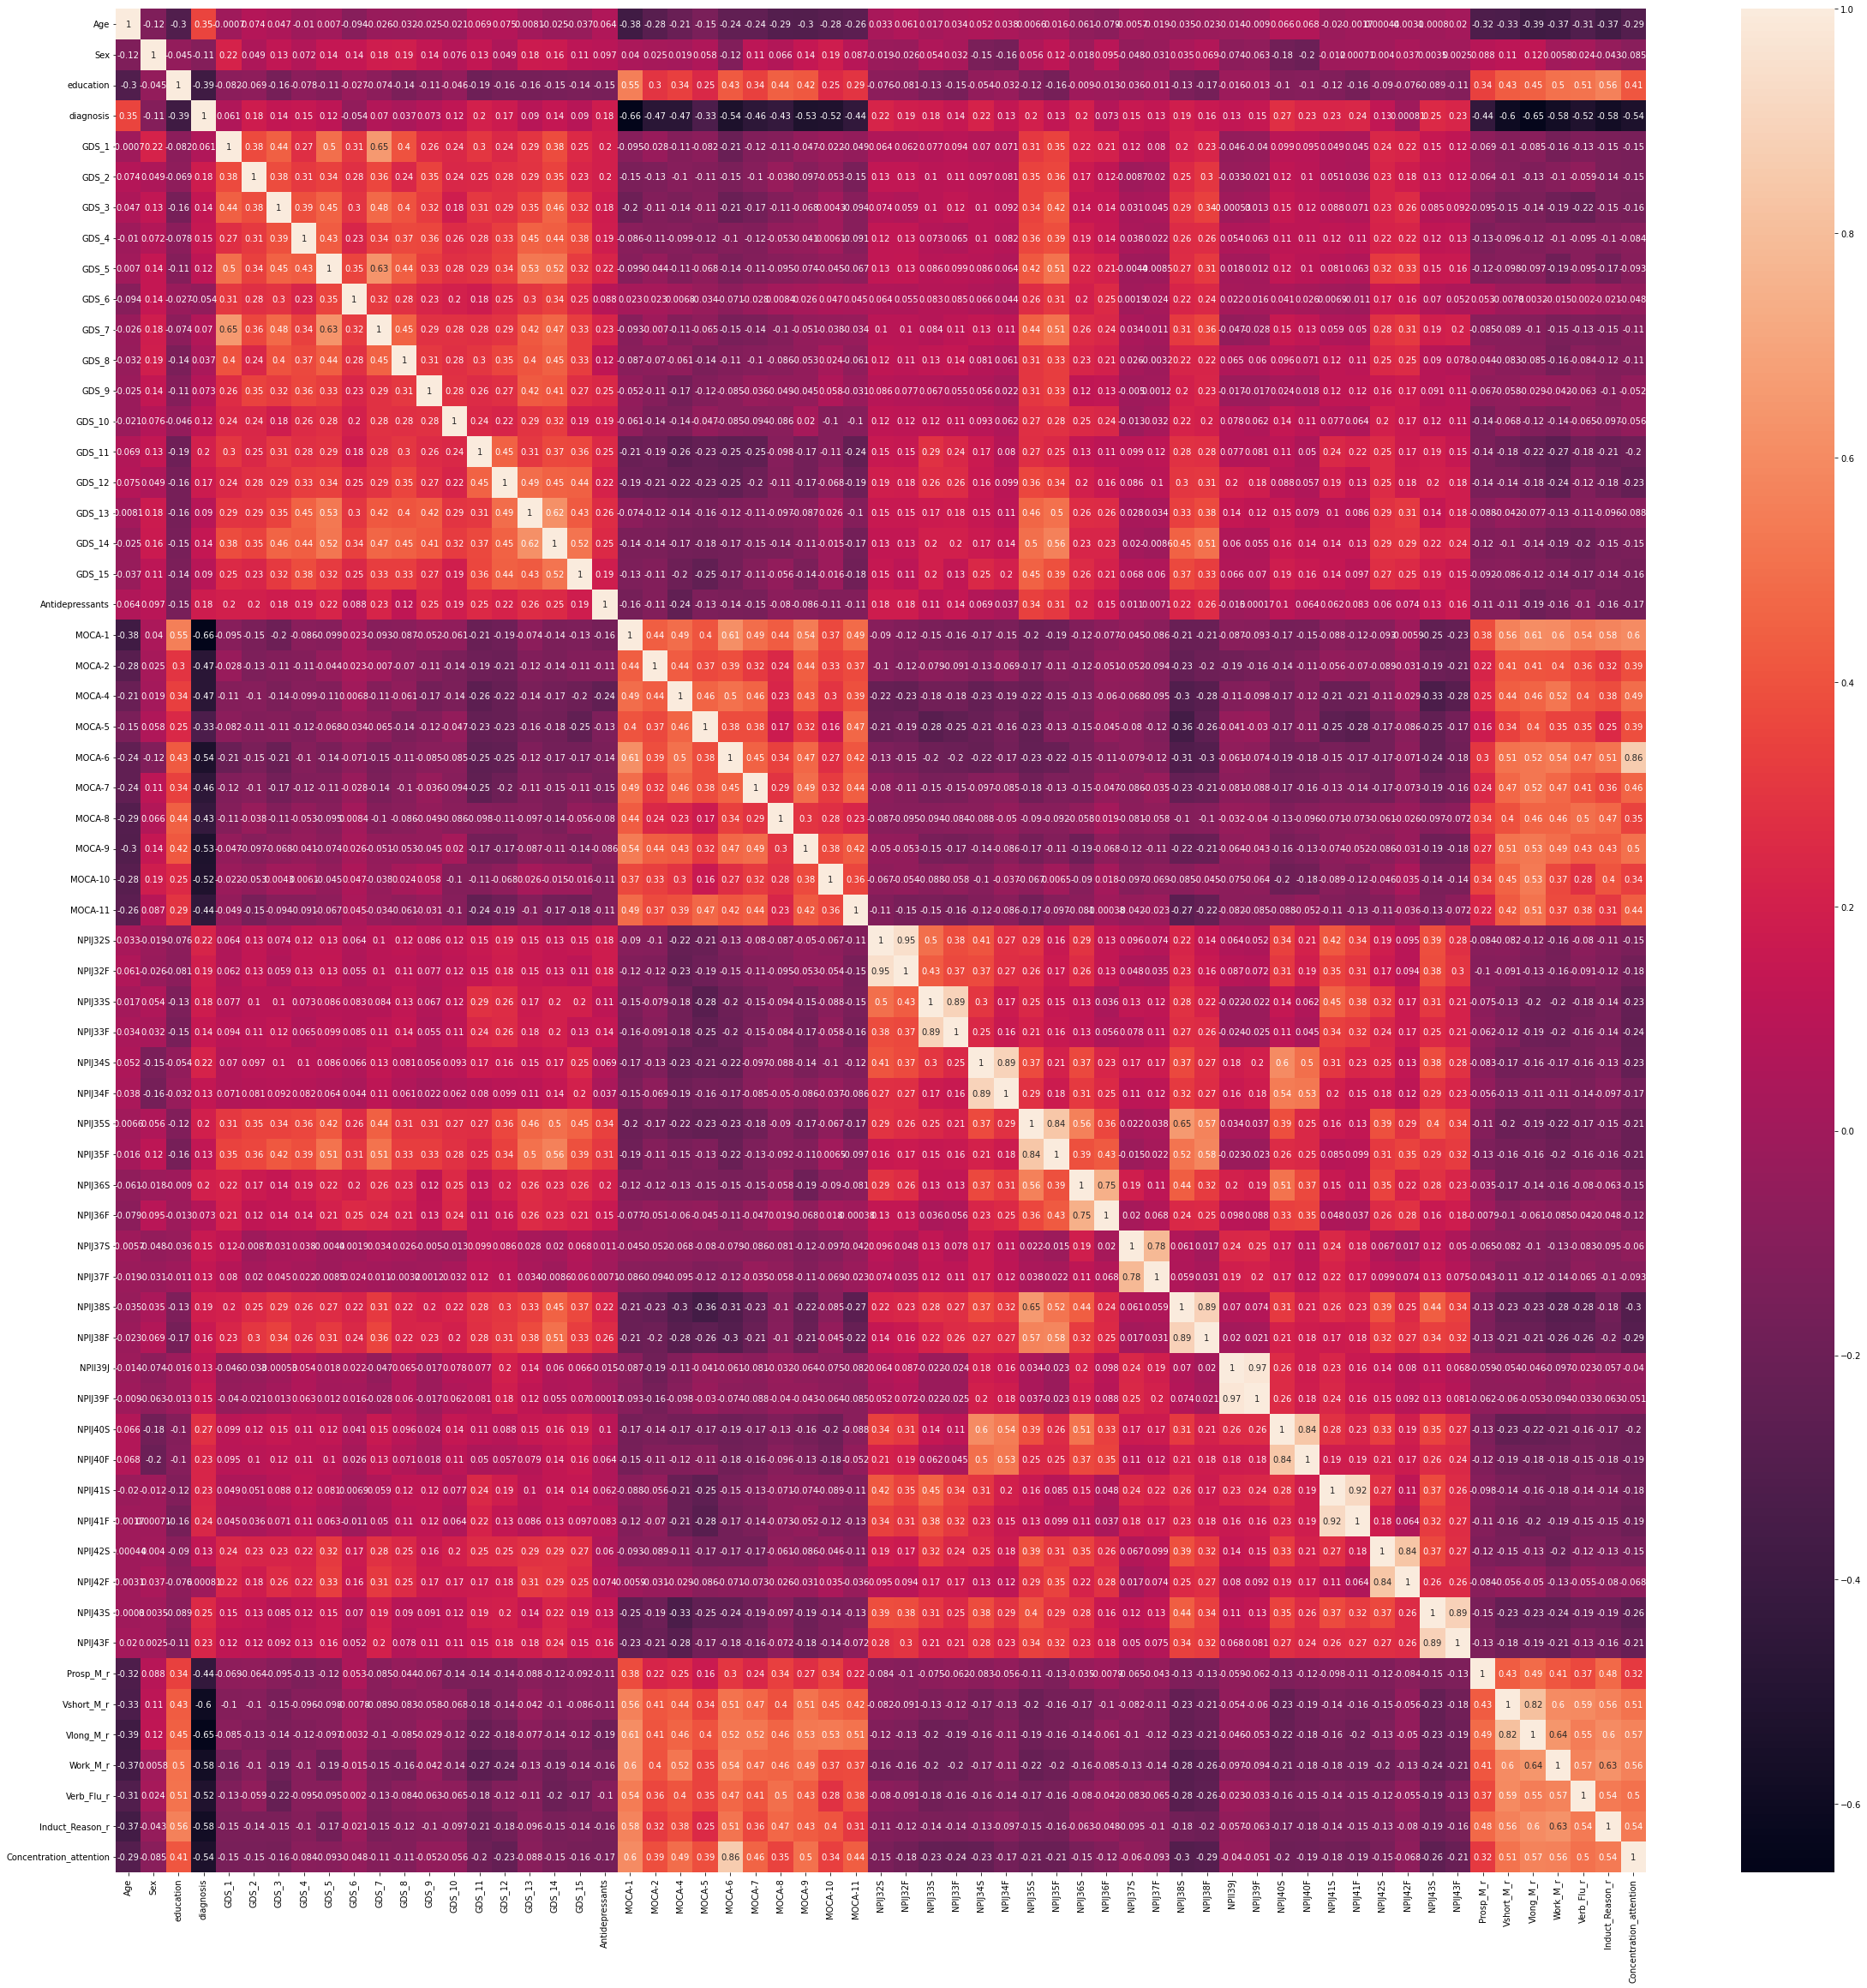

In [29]:
# correlation matrix
corrMatrix = dedomena.corr()
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(corrMatrix, annot=True)
plt.show()

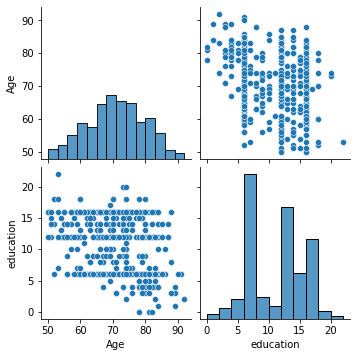

In [30]:
data=dedomena[['Age','education']]
sns.pairplot(data)

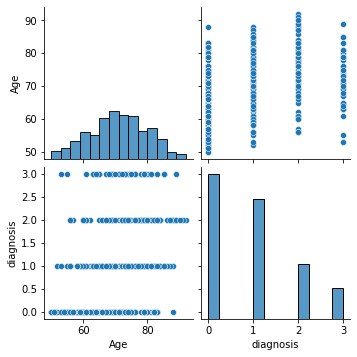

In [31]:
data=dedomena[['Age','diagnosis']]
sns.pairplot(data)

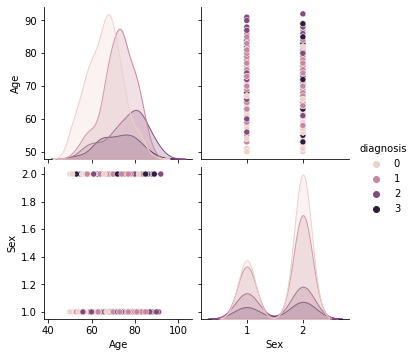

In [32]:
data=dedomena[['Age','diagnosis','Sex']]
sns.pairplot(data,hue='diagnosis')

C:\Users\BILL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

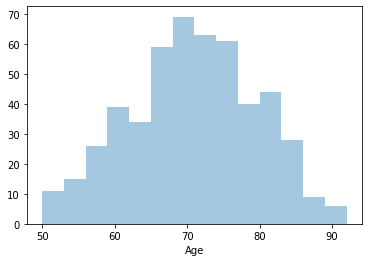

In [33]:
sns.distplot(dedomena['Age'],kde=False)

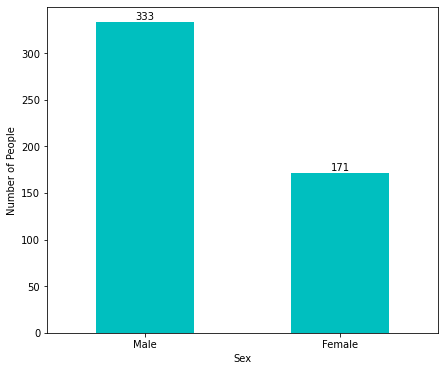

In [34]:
gender = dedomena['Sex'].value_counts()
plt.figure(figsize=(7, 6))
ax = gender.plot(kind='bar', rot=0, color="c")

ax.set_xlabel('Sex')
ax.set_ylabel('Number of People')
ax.set_xticklabels(('Male', 'Female'))

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()

C:\Users\BILL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='education'>

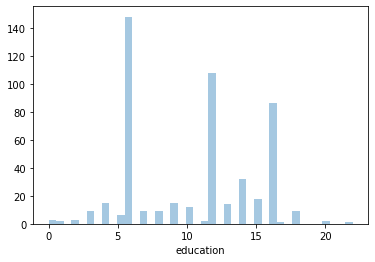

In [35]:
sns.distplot(dedomena['education'],kde=False,bins=40)

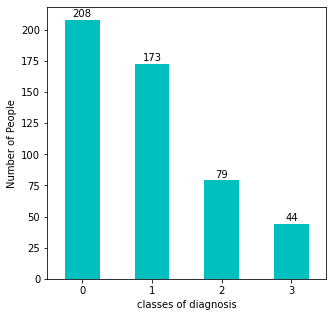

In [36]:
imbalance = dedomena['diagnosis'].value_counts()
plt.figure(figsize=(5, 5))
ax = imbalance.plot(kind='bar', rot=0, color="c")

ax.set_xlabel('classes of diagnosis')
ax.set_ylabel('Number of People')


for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()

# Έλεγχοι υποθέσεων:


In [37]:
# ΕΚ ΤΩΝ ΠΡΟΤΕΡΩΝ ΑΝΑΛΥΣΗ ΓΙΑ ΤΟ ΑΝ ΥΠΑΡΧΟΥΝ ΔΙΑΦΟΡΕΣ ΜΕΤΑΞΥ ΤΩΝ ΟΜΑΔΩΝ
# Έλεγχος υπόθεσης: Αge vs Sex
# Xωρίζουμε ανα φύλο τους ασθενείς
groups1=dedomena.groupby("Sex").groups
groups1

{1: [2, 7, 13, 16, 24, 25, 26, 33, 36, 38, 46, 48, 49, 50, 51, 55, 61, 62, 64, 65, 74, 78, 81, 82, 84, 85, 91, 92, 93, 96, 102, 104, 106, 111, 114, 117, 128, 131, 134, 140, 146, 147, 152, 154, 164, 166, 167, 171, 174, 177, 178, 179, 180, 182, 187, 189, 191, 192, 194, 196, 197, 204, 205, 206, 212, 216, 220, 226, 229, 243, 255, 257, 262, 264, 267, 273, 276, 282, 283, 287, 290, 295, 298, 302, 303, 305, 310, 314, 321, 322, 326, 328, 336, 338, 339, 341, 342, 344, 349, 350, ...], 2: [0, 1, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 17, 18, 19, 20, 21, 22, 23, 29, 30, 31, 32, 34, 35, 37, 39, 40, 41, 43, 45, 52, 53, 54, 56, 57, 58, 59, 60, 66, 70, 71, 72, 73, 75, 76, 77, 79, 80, 83, 88, 89, 90, 94, 95, 97, 98, 99, 100, 101, 103, 105, 107, 108, 109, 110, 112, 113, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 132, 136, 137, 138, 141, 142, 143, 144, 145, 148, 149, 150, 151, 153, 155, 157, 158, ...]}

In [38]:
# δημιουργούμε δύο μεταβλητές στις οποίες εκχωρούνται οι ηλικίες των ανδρ΄ών και γυναικών
Age=dedomena['Age']
group_men=Age[groups1[1]]
group_women=Age[groups1[2]]


In [39]:
# μη παραμετρικός έλεγχος κανονικότητας (Shapiro-Wilk) για τον έλεγχο Age vs Sex
from scipy.stats import shapiro
x=shapiro(group_men)
y=shapiro(group_women)
x,y

(ShapiroResult(statistic=0.9842228889465332, pvalue=0.050107549875974655),
 ShapiroResult(statistic=0.9892572164535522, pvalue=0.014928787015378475))

In [40]:
# μη παραμετρικός έλεγχος Αge vs Sex (Mann-Whitney U test ή Wilcoxon rank sum test, που είναι το μη παραμετρικό αναάλογο του t-test)
import scipy.stats as stats
a_elegxos=stats.mannwhitneyu(x=dedomena['Sex'], y=dedomena['Age'], alternative = 'two-sided')
a_elegxos

MannwhitneyuResult(statistic=0.0, pvalue=2.6636035226300946e-173)

In [41]:
# Έλεγχος υπόθεσης: education vs Sex
# δημιουργούμε δύο μεταβλητές στις οποίες εκχωρούνται τα έτη εκπαίδευσης των ανδρ΄ών και γυναικών
dedomena['education']=dedomena['education'].astype(int)
education=dedomena['education']
group_men1=education[groups1[1]]
group_women2=education[groups1[2]]

C:\Users\BILL\AppData\Local\Temp\ipykernel_12340\3539727473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dedomena['education']=dedomena['education'].astype(int)


In [42]:
# μη παραμετρικός έλεγχος κανονικότητας (Shapiro-Wilk) για τον έλεγχο education vs Sex
z=shapiro(group_men1)
w=shapiro(group_women2)
z,w

(ShapiroResult(statistic=0.9025586843490601, pvalue=3.3239075936108975e-09),
 ShapiroResult(statistic=0.9125133752822876, pvalue=5.413822602023943e-13))

In [43]:
# μη παραμετρικός έλεγχος education vs Sex
b_elegxos=stats.mannwhitneyu(x=dedomena['Sex'], y=dedomena['education'], alternative = 'two-sided')
b_elegxos

MannwhitneyuResult(statistic=2848.5, pvalue=9.533603173227508e-167)

In [44]:
# Έλεγχος υπόθεσης: diagnosis vs Age
# Xωρίζουμε ανα ομάδα διάγνωσης τους ασθενείς
groups2=dedomena.groupby("diagnosis").groups
groups2

{0: [0, 3, 4, 5, 6, 7, 8, 9, 11, 14, 15, 17, 19, 20, 21, 22, 23, 24, 26, 31, 35, 37, 38, 39, 41, 43, 45, 48, 49, 54, 55, 56, 57, 60, 62, 64, 65, 66, 73, 74, 77, 78, 79, 88, 94, 98, 99, 100, 103, 104, 105, 106, 107, 109, 110, 111, 112, 114, 119, 120, 123, 126, 128, 129, 130, 132, 138, 146, 150, 151, 152, 154, 155, 161, 166, 167, 170, 178, 180, 181, 185, 188, 189, 191, 192, 193, 194, 196, 198, 199, 202, 204, 208, 209, 210, 211, 215, 217, 221, 225, ...], 1: [10, 16, 18, 29, 30, 34, 36, 50, 51, 52, 53, 58, 71, 72, 76, 80, 82, 83, 84, 85, 89, 90, 93, 96, 108, 113, 115, 116, 117, 122, 124, 125, 134, 136, 137, 141, 142, 143, 144, 145, 147, 153, 158, 160, 162, 163, 164, 169, 171, 173, 174, 179, 183, 186, 187, 206, 214, 216, 222, 223, 224, 229, 231, 236, 238, 248, 249, 253, 254, 264, 267, 278, 279, 284, 290, 300, 305, 308, 312, 317, 325, 326, 328, 329, 338, 341, 345, 346, 350, 353, 354, 357, 358, 365, 370, 379, 380, 386, 388, 391, ...], 2: [1, 2, 12, 13, 25, 32, 33, 40, 59, 61, 91, 92, 95, 97, 

In [45]:
# Ανάθεση των αποτελεσμάτων της ομαδοποίησης που έγινε παραπάνω, σε σχέση με την μεταβλητή Age.
# Δηλαδή έχουμε για κάθε group_i, τις ηλικίες των ασθενών που ανήκουν στην κλάση διάγνωσης i, i=0, 1, 2, 3. 
Age=dedomena['Age']
group_0=Age[groups2[0]]
group_1=Age[groups2[1]]
group_2=Age[groups2[2]]
group_3=Age[groups2[3]]

In [46]:
# έλεγχος κανονικότητας, προκειμένου να ελέγξουμε αν μπορούμε να κάνουμε One-way Anova
shapiro(group_0)

ShapiroResult(statistic=0.9884857535362244, pvalue=0.09240858256816864)

In [47]:
shapiro(group_1)

ShapiroResult(statistic=0.9812799692153931, pvalue=0.019777972251176834)

In [48]:
shapiro(group_2)

ShapiroResult(statistic=0.952211320400238, pvalue=0.00496307946741581)

In [49]:
shapiro(group_3)

ShapiroResult(statistic=0.9763686656951904, pvalue=0.4953047037124634)

In [50]:
# Υπολογισμός μέσης τιμής και τυπικής απόκλισης για την μεταβλητή Age με την κλάση διάγνωσης "0"(ανάλογα αποτελέσματα δίνονται για "1", "2" και "3".)
d1=group_0.mean()
d2=group_0.std()
d1,d2


(66.11057692307692, 7.905986458866093)

In [51]:
# Kruskal-Wallis Test (είναι το μη παραμετρικό ανάλογo του One-way ANOVA)
stats.kruskal(group_0, group_1, group_2, group_3)

KruskalResult(statistic=93.42980403732868, pvalue=4.015452892450027e-20)

In [52]:
# Post hoc analysis με τον έλεγχο Dunn
!pip install scikit-posthocs
import scikit_posthocs as sp


In [53]:
# ΕΚ ΤΩΝ ΥΣΤΕΡΩΝ ΑΝΑΛΥΣΗ ΓΙΑ ΤΟ ΠΟΥ ΑΚΡΙΒΩΣ ΥΠΑΡΧΟΥΝ ΔΙΑΦΟΡΕΣ
# diagnosis vs Age (post hoc with Dunn)
data=[group_0, group_1, group_2, group_3]
sp.posthoc_dunn(data)

1             2             3         4
1  1.000000e+00  3.079368e-13  5.720497e-17  0.000032
2  3.079368e-13  1.000000e+00  8.737024e-03  0.724112
3  5.720497e-17  8.737024e-03  1.000000e+00  0.027129
4  3.155210e-05  7.241116e-01  2.712949e-02  1.000000

In [67]:
# X^2 έλεγχος για diagnosis vs Sex
# πίνακας συνάφειας 
table = pd.crosstab(dedomena.Sex, dedomena.diagnosis, margins=True)
table

diagnosis    0    1   2   3  All
Sex                             
1           60   58  35  18  171
2          148  115  44  26  333
All        208  173  79  44  504

In [68]:
# πίνακας συχνοτ΄ήτων
freq_table= table/len(dedomena)
  
freq_table

diagnosis         0         1         2         3       All
Sex                                                        
1          0.119048  0.115079  0.069444  0.035714  0.339286
2          0.293651  0.228175  0.087302  0.051587  0.660714
All        0.412698  0.343254  0.156746  0.087302  1.000000

504

In [55]:
# Με ενδιαφέρει μόνο το p-value του ελέγχου άρα εμφανίζω μόνο αυτό
from scipy.stats import chi2_contingency 
statistic, pvalue, dfreedom, array1=stats.chi2_contingency(table)
pvalue

0.5195564071951246

In [56]:
# X^2 έλεγχος για diagnosis vs education (θεωρώντας κατηγορική την education)
# πίνακας συνάφειας 
table1 = pd.crosstab(dedomena.diagnosis, dedomena.education, margins=True)
table1

education  0  1  2  3   4  5    6  7  8   9  10  11   12  13  14  15  16  17  \
diagnosis                                                                      
0          1  0  0  0   2  1   20  2  5   6   7   1   60   9  18  10  58   0   
1          0  0  0  2   4  2   80  5  3   4   3   1   29   4   8   6  20   1   
2          2  2  3  4   6  2   33  1  0   3   2   0   12   0   2   0   4   0   
3          0  0  0  3   3  1   15  1  1   2   0   0    7   1   4   2   4   0   
All        3  2  3  9  15  6  148  9  9  15  12   2  108  14  32  18  86   1   

education  18  20  22  All  
diagnosis                   
0           6   1   1  208  
1           1   0   0  173  
2           2   1   0   79  
3           0   0   0   44  
All         9   2   1  504

In [57]:
statistic2, pvalue2, dfreedom2, array2=stats.chi2_contingency(table1)
pvalue2

1.930846642120488e-08

In [58]:
# θεωρούμε συνεχή την μεταβλητή education που έχει διακριτοποιηθεί
# Εξετάζουμε αν εφαρμόζεται Anova για diagnosis vs education, μέσω των ελέγχων για Κανονικότητα (Shapiro-Wilk tests)
# έλεγχος κανονικότητας εντός των υποομάδων "0", "1", "2" και "3", σε σχέση με την μεταβλητή education
education=dedomena['education']
group0_0=education[groups2[0]]
group1_1=education[groups2[1]]
group2_2=education[groups2[2]]
group3_3=education[groups2[3]]

In [59]:
shapiro(group0_0)

ShapiroResult(statistic=0.9079776406288147, pvalue=4.745583370713291e-10)

In [60]:
shapiro(group1_1)

ShapiroResult(statistic=0.8220429420471191, pvalue=2.976177789458523e-13)

In [61]:
shapiro(group2_2)

ShapiroResult(statistic=0.895582377910614, pvalue=8.943215107137803e-06)

In [62]:
shapiro(group3_3)

ShapiroResult(statistic=0.8765572905540466, pvalue=0.00022338370035868138)

In [63]:
# Kruskal-Wallis Test 
stats.kruskal(group0_0, group1_1, group2_2, group3_3)

KruskalResult(statistic=102.66801494772457, pvalue=4.147165945217608e-22)

In [64]:
# diagnosis vs education (post-hoc analysis with Dunn)
data1=[group0_0, group1_1, group2_2, group3_3]
sp.posthoc_dunn(data1)

1             2             3             4
1  1.000000e+00  1.059875e-13  2.803907e-18  4.297844e-07
2  1.059875e-13  1.000000e+00  4.327185e-03  6.612281e-01
3  2.803907e-18  4.327185e-03  1.000000e+00  9.564950e-02
4  4.297844e-07  6.612281e-01  9.564950e-02  1.000000e+00